### This notebook uses the Auto ARIMA function along the SARIMA Forecasting model to forecast prices for the next 2 years based on 10-year historical data.

#### Please tun the next cell to import all libraries used in this notebook.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
# Load the data
file_path = 'Scripts/livestock_commodity.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()


,Date,LIVE CATTLE,LEAN HOGS
0,3/1/00,69.700,55.975
1,4/1/00,69.075,55.625
2,5/1/00,68.975,55.075
3,6/1/00,70.075,55.175
4,7/1/00,70.875,55.625


#### The errors in the next 3 cells will be corrected after running the 3rd cell, however, this error will only occur if the Date is not in the proper datetime format. 

Ensure the file follows the following format "d-m-y" & the file has no missing values.

In [17]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['LIVE CATTLE'], label='Live Cattle')
plt.plot(data['LEAN HOGS'], label='Lean Hogs')
plt.title('Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Perform seasonal decomposition
decompose_result_cattle = seasonal_decompose(data['LIVE CATTLE'], model='additive', period=12)
decompose_result_hogs = seasonal_decompose(data['LEAN HOGS'], model='additive', period=12)

# Plot the seasonal decomposition results
decompose_result_cattle.plot()
plt.suptitle('Seasonal Decomposition of Live Cattle Prices', fontsize=16)
plt.show()

decompose_result_hogs.plot()
plt.suptitle('Seasonal Decomposition of Lean Hogs Prices', fontsize=16)
plt.show()


ValueError: time data '13/1/00' does not match format '%m/%d/%y' (match)

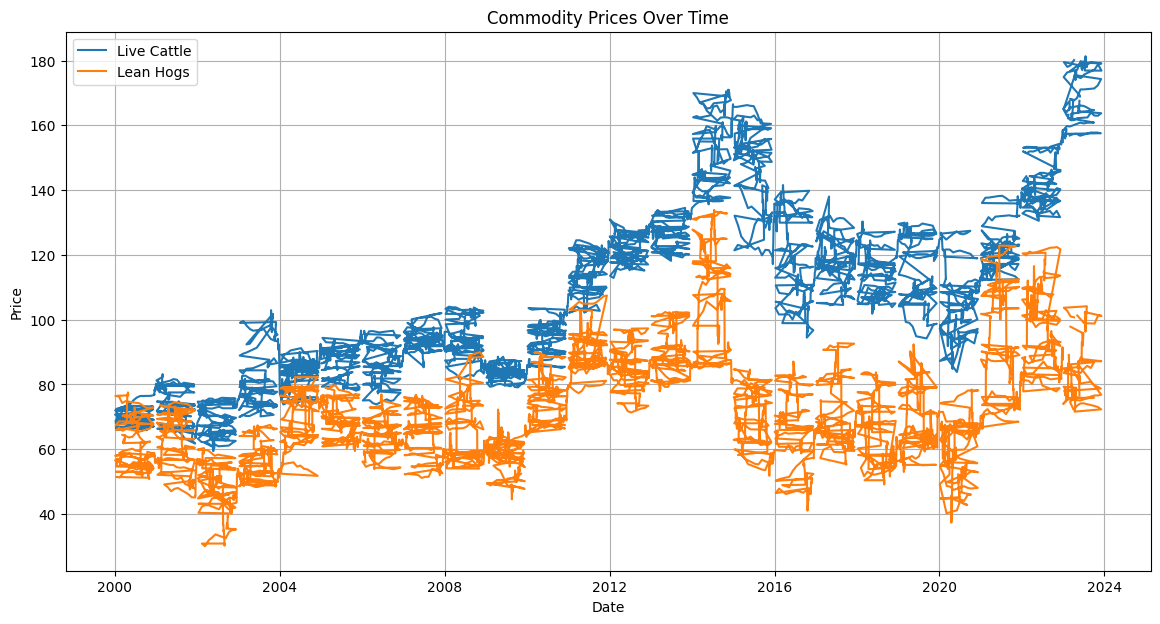

ValueError: This function does not handle missing values

In [18]:
# Function to parse dates
def parse_dates(date_str):
    for fmt in ('%m/%d/%y', '%d/%m/%y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    raise ValueError(f"no valid date format found for {date_str}")

# Apply the function to the Date column
data['Date'] = data['Date'].apply(parse_dates)
data.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['LIVE CATTLE'], label='Live Cattle')
plt.plot(data['LEAN HOGS'], label='Lean Hogs')
plt.title('Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Perform seasonal decomposition
decompose_result_cattle = seasonal_decompose(data['LIVE CATTLE'], model='additive', period=12)
decompose_result_hogs = seasonal_decompose(data['LEAN HOGS'], model='additive', period=12)

# Plot the seasonal decomposition results
decompose_result_cattle.plot()
plt.suptitle('Seasonal Decomposition of Live Cattle Prices', fontsize=16)
plt.show()

decompose_result_hogs.plot()
plt.suptitle('Seasonal Decomposition of Lean Hogs Prices', fontsize=16)
plt.show()


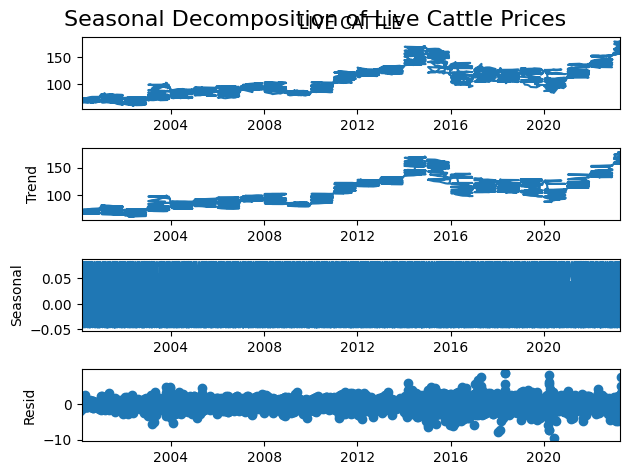

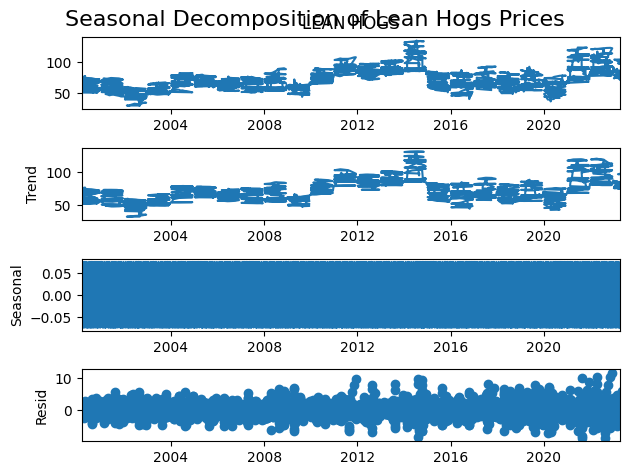

In [19]:
# Handle missing values by forward-filling
data.fillna(method='ffill', inplace=True)

# Perform seasonal decomposition
decompose_result_cattle = seasonal_decompose(data['LIVE CATTLE'], model='additive', period=12)
decompose_result_hogs = seasonal_decompose(data['LEAN HOGS'], model='additive', period=12)

# Plot the seasonal decomposition results
decompose_result_cattle.plot()
plt.suptitle('Seasonal Decomposition of Live Cattle Prices', fontsize=16)
plt.show()

decompose_result_hogs.plot()
plt.suptitle('Seasonal Decomposition of Lean Hogs Prices', fontsize=16)
plt.show()


#### At this point, the SARIMA model is ready for exploration

C:\Users\Isaiah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaiah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaiah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaiah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaiah\anaconda3\lib\

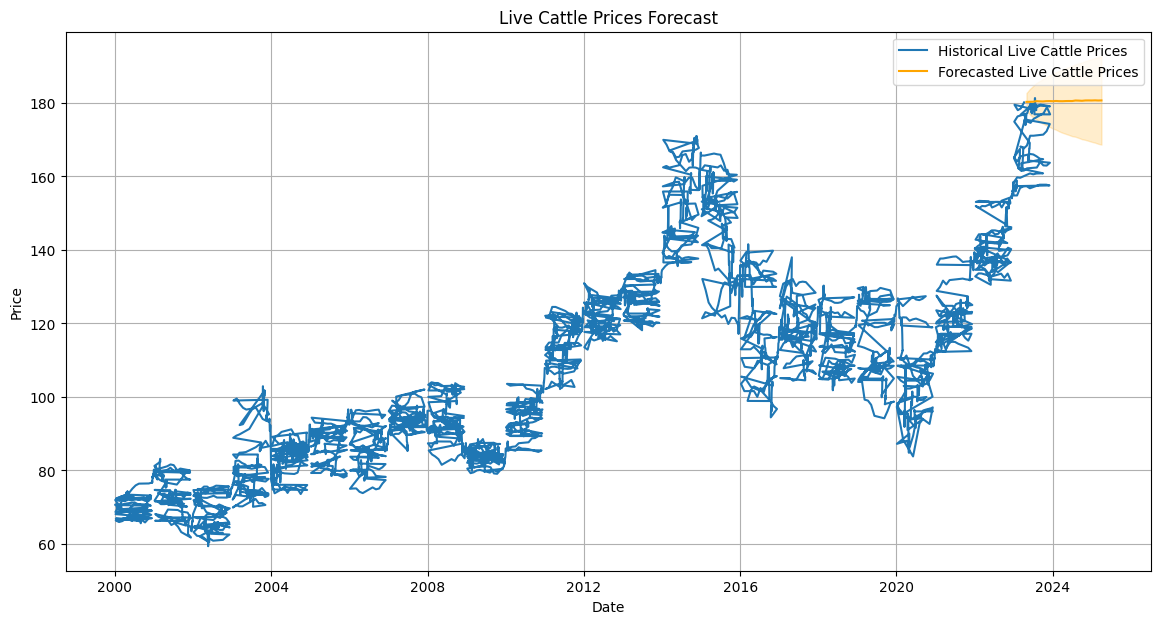

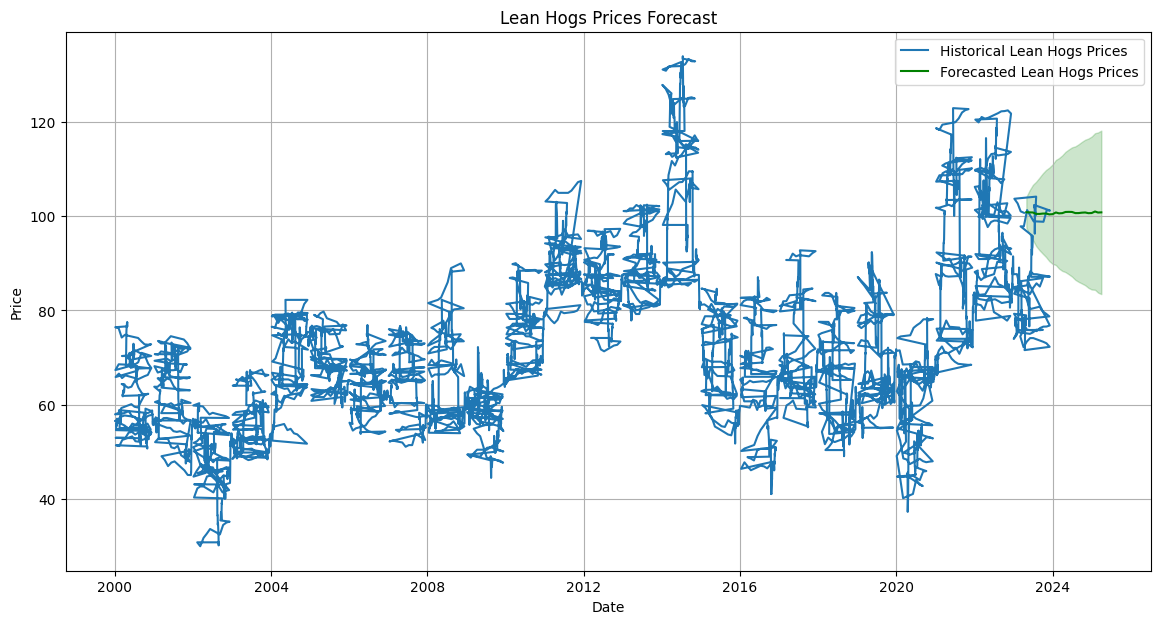

In [20]:
# Define the SARIMA model configuration
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit the SARIMA model for Live Cattle
sarima_cattle = SARIMAX(data['LIVE CATTLE'], order=order, seasonal_order=seasonal_order)
sarima_cattle_fit = sarima_cattle.fit(disp=False)

# Fit the SARIMA model for Lean Hogs
sarima_hogs = SARIMAX(data['LEAN HOGS'], order=order, seasonal_order=seasonal_order)
sarima_hogs_fit = sarima_hogs.fit(disp=False)

# Forecast future values (next 24 months)
forecast_steps = 24
cattle_forecast = sarima_cattle_fit.get_forecast(steps=forecast_steps)
cattle_forecast_ci = cattle_forecast.conf_int()

hogs_forecast = sarima_hogs_fit.get_forecast(steps=forecast_steps)
hogs_forecast_ci = hogs_forecast.conf_int()

# Create the forecast dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')

# Plot the forecasts along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['LIVE CATTLE'], label='Historical Live Cattle Prices')
plt.plot(forecast_dates, cattle_forecast.predicted_mean, label='Forecasted Live Cattle Prices', color='orange')
plt.fill_between(forecast_dates, cattle_forecast_ci.iloc[:, 0], cattle_forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('Live Cattle Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data['LEAN HOGS'], label='Historical Lean Hogs Prices')
plt.plot(forecast_dates, hogs_forecast.predicted_mean, label='Forecasted Lean Hogs Prices', color='green')
plt.fill_between(forecast_dates, hogs_forecast_ci.iloc[:, 0], hogs_forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('Lean Hogs Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#### We note that the graph above take data points of every day in the past 20 years, we will only take the monthly average of the last 20 years. Our datapoints will decrease from ~7305 to ~240 data points to forecast prices in the next 24 months

From earlier observations, the SARIMA model does not function properly when it has too many datapoints in a month, as such taking the average monthly prices over 20 years makes the dataset less noisy and more easier for SARIMA to take in and perform the model building

In [25]:
!pip install pmdarima

     ------------------------------------- 615.0/615.0 kB 19.5 MB/s eta 0:00:00


#### This section onwards using Auto ARIMA to determine the best ARIMA parameter to forecast the next 2 years of data, using 10-year historical data.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=775.868, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1022.089, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=780.997, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=901.582, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1404.860, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=782.191, Time=0.15 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=781.282, Time=0.38 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=776.645, Time=1.11 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=779.792, Time=1.17 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=781.879, Time=0.11 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=780.640, Time=0.32 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=779.466, Time=0.64 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=779.382, Time=1.32 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=772.625, Time=0.39 sec
 ARIMA(1,0,2)(0,0,1)[12] interc

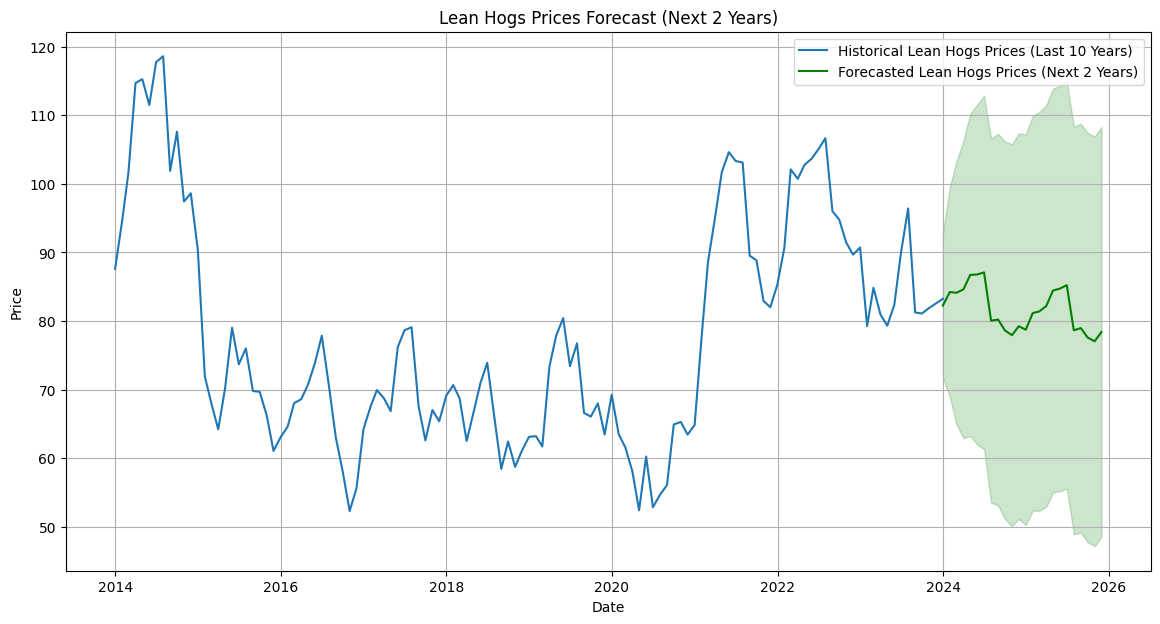

In [96]:
# Filter the data for the last 10 years
end_date = monthly_data.index[-1]
start_date = end_date - pd.DateOffset(years=10)
filtered_data = monthly_data.loc[start_date:end_date]

# Fit auto_arima model on the filtered data
model_hogs = pm.auto_arima(filtered_data['LEAN HOGS'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast future values (next 24 months, i.e., 2 years)
forecast_steps = 24

hogs_forecast = model_hogs.predict(n_periods=forecast_steps, return_conf_int=True)

# Extract forecast values and confidence intervals
hogs_forecast_mean, hogs_forecast_ci = hogs_forecast

# Create the forecast dates
forecast_dates = pd.date_range(start=filtered_data.index[-1] + pd.DateOffset(0), periods=forecast_steps, freq='M')

plt.figure(figsize=(14, 7))
plt.plot(filtered_data['LEAN HOGS'], label='Historical Lean Hogs Prices (Last 10 Years)')
plt.plot(forecast_dates, hogs_forecast_mean, label='Forecasted Lean Hogs Prices (Next 2 Years)', color='green')
plt.fill_between(forecast_dates, hogs_forecast_ci[:, 0], hogs_forecast_ci[:, 1], color='green', alpha=0.2)
plt.title('Lean Hogs Prices Forecast (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=932.384, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=666.164, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=822.170, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=931.995, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=681.869, Time=0.03 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=924.829, Time=0.09 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=667.853, Time=0.17 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=821.651, Time=0.23 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=664.763, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=680.559, Time=0.02 sec
 ARIMA(1,0,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,0,0)(0,1,1)[12]             : AIC=inf, T

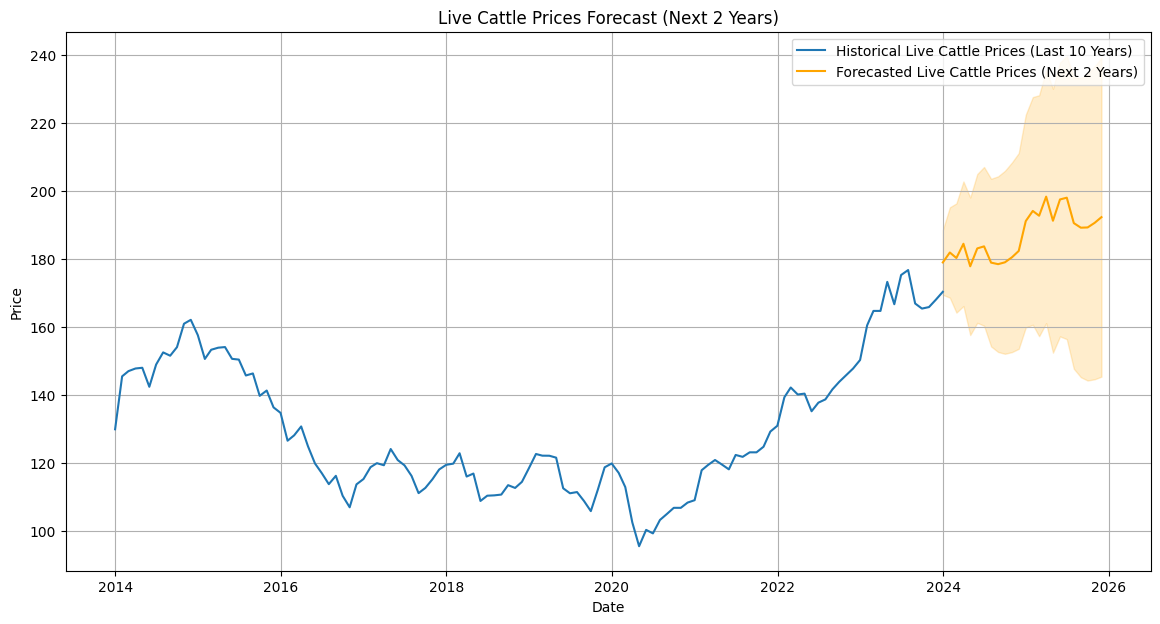

In [95]:
# Filter the data for the last 10 years
end_date = monthly_data.index[-1]
start_date = end_date - pd.DateOffset(years=10)
filtered_data = monthly_data.loc[start_date:end_date]

# Fit auto_arima model on the filtered data with specific ARIMA parameters
model_cattle = pm.auto_arima(filtered_data['LIVE CATTLE'], seasonal=True, m=12,
                             start_p=1, start_q=2, max_p=1, max_q=2, start_P=1, start_Q=1, max_P=1, max_Q=1,
                             d=0, D=1, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True, enforce_stationarity=False, enforce_invertibility=False)

# Forecast future values (next 24 months, i.e., 2 years)
forecast_steps = 24
cattle_forecast = model_cattle.predict(n_periods=forecast_steps, return_conf_int=True)

# Extract forecast values and confidence intervals
cattle_forecast_mean, cattle_forecast_ci = cattle_forecast

# Create the forecast dates
forecast_dates = pd.date_range(start=filtered_data.index[-1], periods=forecast_steps, freq='M')

# Plot the forecasts along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['LIVE CATTLE'], label='Historical Live Cattle Prices (Last 10 Years)')
plt.plot(forecast_dates, cattle_forecast_mean, label='Forecasted Live Cattle Prices (Next 2 Years)', color='orange')
plt.fill_between(forecast_dates, cattle_forecast_ci[:, 0], cattle_forecast_ci[:, 1], color='orange', alpha=0.2)
plt.title('Live Cattle Prices Forecast (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#### This section enforces a specific SARIMA Parameter with the help of SARIMAX, only tweak if the pmdarima (auto arima) yields a parameter you want to use.

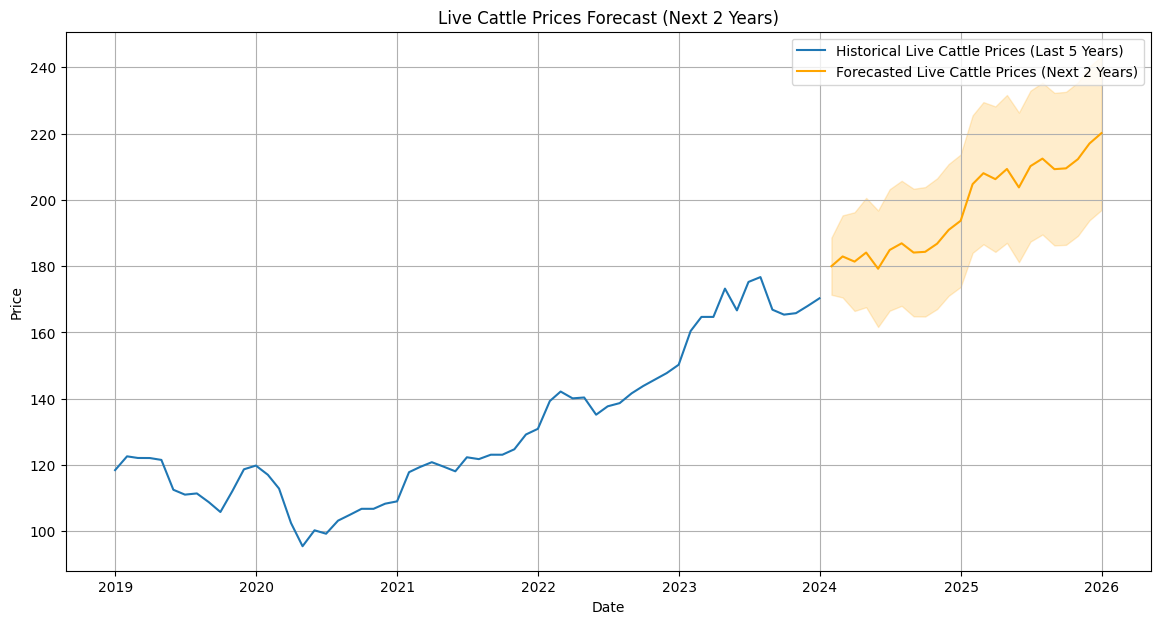

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to fit SARIMA and forecast
def fit_sarima_and_forecast(data, steps, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.get_forecast(steps=steps)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    return forecast_mean, forecast_ci

# Filter the data for the last 10 years
end_date = monthly_data.index[-1]
start_date = end_date - pd.DateOffset(years=5)
filtered_data = monthly_data.loc[start_date:end_date]

# Define order and seasonal order for Live Cattle
order = (1, 0, 2)
seasonal_order = (1, 0, 1, 12)

# Forecast future values for Live Cattle (next 24 months, i.e., 2 years)
forecast_steps = 24
cattle_forecast_mean, cattle_forecast_ci = fit_sarima_and_forecast(filtered_data['LIVE CATTLE'], forecast_steps, order, seasonal_order)

# Create the forecast dates starting immediately after the last historical data point
forecast_dates = pd.date_range(start=filtered_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the forecasts along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['LIVE CATTLE'], label='Historical Live Cattle Prices (Last 5 Years)')
plt.plot(forecast_dates, cattle_forecast_mean, label='Forecasted Live Cattle Prices (Next 2 Years)', color='orange')
plt.fill_between(forecast_dates, cattle_forecast_ci.iloc[:, 0], cattle_forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('Live Cattle Prices Forecast (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
